# Table des matières :

* <a href="#Introduction">1. Introduction</a>
* <a href="#Envoyer une requête HTTP avec Python">2. Envoyer une requête HTTP avec Python</a>
* <a href="#Parser une page web avec BeautifulSoup">3. Parser une page web avec <code>BeautifulSoup</code></a>
* <a href="#Avec une vraie page web...">4. Avec une vraie page web...</a>
    * <a href="#Faire la soupe">4.1. Faire la soupe !</a>
    * <a href="#Comprendre la structure de la page web">4.2. Comprendre la structure de la page web</a>
    * <a href="#Récupérer les métadonnées">4.3. Récupérer les métadonnées</a>
    * <a href="#Tourner la page">4.4. Tourner la page...</a>
    * <a href="#Remettons un peu d'ordre">4.5. Remettons un peu d'ordre</a>

## <div id="Introduction">1. Introduction</div>

Commençons peut-être par définir et expliciter en quoi consiste le **web scraping**. On peut résumer cela en trois points, en empruntant une définition simple proposée par Kimberly Fessel :
* Collecter de l'information depuis des sites web
* Parser son contenu dans un format structuré que l'on puisse représenter et extraire de la même façon (CSV, JSON, XML, etc.)
* Faire le tout de façon entièrement automatisée

Se pose également une question plus pratique : pourquoi apprendre à scraper des pages web ? Il y a plusieurs raisons à cela, mais la question a d'autant plus de sens lorsqu'on croise de nombreuses ressources et outils proposant de scraper des sites web sans plonger davantage dans le code. Listons-en quelques-une :
* Le web scraping permet de gagner énormément de temps : si l'on souhaite constituer des jeux de données massifs, il devient quasiment inenvisageable de constituer manuellement des tableaux de données de plus de quelques milliers de lignes
* C'est une technique qui permet, non pas seulement d'accéder à des données, mais de se constituer soi-même ses propres jeux de données en croisant, associant diverses sources
* Elle est une façon de se familiariser avec la construction de données structurées et offre de nombreux concepts et façons de faire transposables à de nombreuses autres opérations faisant intervenir des données structurées (tri de fichiers, catégorisation, tagging, cartographie, etc.)
* Enfin, elle constitue un outil d'exploration qui permet de mieux appréhender le fonctionnement des infrastructures numériques contemporaines, en particulier de l'internet et du web

On l'aura compris, le **web scraping** vous dote de **super pouvoirs**, mais qui dit grands pouvoirs, dit aussi grandes responsabilités. Ainsi, nous évoquerons les aspects éthiques et légaux du **web scraping** dans le module final de cette formation.

Dans ce module, nous passons à la pratique en explorant nos premiers cas concrets d'application de Python pour le **web scraping**. Avant d'entamer ce module, il est vivement conseillé de revoir :
* Le module 1 et d'être à l'aise avec le fonctionnement de langages à balises comme HTML
* Les module 2 et 3 et d'être à l'aise avec les pratiques élémentaires de programmation avec Python (structures de données, boucles, conditions, etc.)

Au cours de ce module, nous apprendrons :
* A envoyer une requête HTTP à un serveur à l'aide du module `requests`
* A parser une page HTML simple à l'aide du module `BeautifulSoup`

## <div id="Envoyer une requête HTTP avec Python">2. Envoyer une requête HTTP avec Python</div>

Accéder à une page web suppose avant tout de la récupérer : pour cela, on utilise le **protocole HTTP** qui nous permet de former des **requêtes HTTP**. L'objectif ici n'est pas de rentrer dans le détail, d'autant que nous avons pu voir quelques aspects élémentaires durant le premier module, que de comprendre simplement les différentes étapes qui structurent un projet de **web scraping**.

Python dispose d'une **bibliothèque** nommée `requests` qui permet de construire et d'envoyer des **requêtes HTTP**. Il existe d'autres façons de faire, mais `requests` a l'avantage d'être simple d'utilisation et d'être très flexible et pourra vous être utile pour bien d'autres projets.

Voyons toute de suite comment récupérer le contenu d'une page web à l'aide de `requests`.

In [9]:
import requests

r = requests.get("https://www.msh-lse.fr/")
# Affichons simplement les 1000 premiers caractères car la page est très longue
print(r.text[:1000])

<!doctype html>
<html lang="fr-FR">
  <head>
      <script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
    new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
    j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
    'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
    })(window,document,'script','dataLayer','GTM-KNCB8CD');</script>
  
  <meta charset="utf-8">
  <meta http-equiv="x-ua-compatible" content="ie=edge">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <meta http-equiv="Content-Type" content="text/html; charset=UTF-8" X-Content-Type-Options="nosniff">

  <link href="https://www.msh-lse.fr/wp-content/themes/pamplemousse/dist/images/favicons/apple-touch-icon-57x57.png" rel="apple-touch-icon-precomposed" sizes="57x57">
  <link href="https://www.msh-lse.fr/wp-content/themes/pamplemousse/dist/images/favicons/apple-touch-icon-114x114.png" rel="apple-tou


Prenons le temps de commenter ces quelques lignes.

Comme avec toute **bibliothèque** de code, il s'agit dans un premier temps de l'importer.

Ensuite, on peut utiliser l'**objet** `requests` sur lequel on peut appeler différentes méthodes. Dans notre cas, nous allons utiliser uniquement la **méthode** `.get()` car nous ne nous intéressons qu'à la récupération de pages web. Cette **méthode** `.get()` prend plusieurs **paramètres** et doit contenir, au minimum, un **paramètre** indiquant l'**adresse URL** qui nous intéresse.

`requests` renvoie un objet de type `requests.models.Response`. C'est la **réponse** que le serveur nous a renvoyé lorsque nous avons demandé notre **URL** dans la **requête HTTP** que nous lui avons envoyé.

Cet **objet** dispose de différentes **propriétés** : la première qui nous intéresse ici est celle nommée `.text`. Elle permet de récupérer l'intégralité du code source de page web (donc du code HTML). A partir de ce code, nous allons pouvoir récupérer les éléments qui nous intéressent.

In [12]:
print(type(r))

<class 'requests.models.Response'>


### <div id="Un peu de pratique : Construire et envoyer plusieurs requêtes HTTP">2. 2. Un peu de pratique : Construire et envoyer plusieurs requêtes HTTP</div>

<div class="alert alert-success" role="alert"><strong>Premier exercice : </strong>Dans cet exercice, nous allons créer un seul modèle de requête à l'aide de <code>requests</code> à partir duquel nous effectuerons plusieurs requêtes différentes pour récupérer le code HTML des pages web suivantes :
<ul>
    <li><a href="http://www.reddit.com/r/HTML">http://www.reddit.com/r/HTML</a></li>
    <li><a href="http://www.reddit.com/r/python">http://www.reddit.com/r/python</a></li>
    <li><a href="http://www.reddit.com/r/webscraping">http://www.reddit.com/r/webscraping</a></li>
</ul>
L'objectif est de partir de la liste suivante, qui contient le nom des sub-reddit correspondants : <code>subreddit = ["html", "python", "webscraping"]</code>. On stockera la réponse dans un dictionnaire qui fera correspondre le sub reddit avec le contenu de la page. Si vous vous sentez intrépide, vous pouvez encapsuler le tout dans une fonction pour avoir un code propre et réutilisable.
</div>

<div class="alert alert-danger" role="alert"><strong>Utiliser la boîte à outil Python pour créer un pipeline de requêtes HTTP :</strong>
<br>
<br>
<pre><code>import requests

subreddit = ["html", "python", "webscraping"]
content = {}

def req(subreddit):
    r = requests.get(f"http://www.reddit.com/r/{subreddit}")
    return r.text

for sub in subreddit:
    content[sub] = req(sub)</code></pre>
</div>

## <div id="Parser une page web avec BeautifulSoup">3. Parser une page web avec <code>BeautifulSoup</code></div>

Maintenant que nous savons comment récupérer le contenu d'une page web, il ne nous reste plus qu'à apprendre comment **parser** une page web !

**Parser** un document signifie le parcourir intégralement et le filtrer afin de ne récupérer que les parties qui nous intéresse. Cela peut être utile lorsque l'on souhaite extraire des données, comme dans notre cas, mais également lorsqu'on souhaite modifier un document, compter des occurrences, etc.

`BeautifulSoup` nous aide grandement pour cela. Il y a mille et une façons de s'y prendre pour récupérer les informations qui nous intéressent mais le plus important est d'abord de savoir ce que l'on peut faire et ce que l'on ne peut pas faire. Pour cela, pas de secret, on se dirige à nouveau vers la documentation : https://www.crummy.com/software/BeautifulSoup/bs4/doc/. La chance avec `BeautifulSoup`, c'est que la documentation est particulièrement bien faite et très riche : on trouve de nombreux exemples pour comprendre, en contexte, comment utiliser les méthodes de la bibliothèque.

Commençons par voir un exemple.

In [1]:
from bs4 import BeautifulSoup

with open("data/module_1-carnet.html", "r") as file:
    html = file.read()

soup = BeautifulSoup(html, "html.parser")
print(soup.find_all("li", attrs={"class": "email"}))

[<li class="email" id="personnel">wsenter0@blogspot.com</li>, <li class="email" id="professionnel">wsenter0@cyberchimps.com</li>, <li class="email" id="personnel">abroddle1@tripadvisor.com</li>, <li class="email" id="professionnel">abroddle1@wisc.edu</li>, <li class="email" id="personnel">aboothebie2@e-recht24.de</li>, <li class="email" id="professionnel">aboothebie@irs.gov</li>, <li class="email" id="personnel">meast3@webeden.co.uk</li>, <li class="email" id="personnel">meast3@sohu.com</li>, <li class="email" id="personnel">cmcging4@so-net.ne.jp</li>, <li class="email" id="professionnel">cmcging4@people.com.cn</li>]


Avant de travailler à partir d'une vraie page web, commençons par un petit échauffement avec un fichier HTML très simple (et mal formé, soit dit en pensant, si on se souvient des éléments vus dans le premier module).

Le fonctionnement est assez simple : pour **parser** une page web (donc un document HTML) ou un fichier XML avec `BeautifulSoup`, on appelle la fonction `BeautifulSoup()` à laquelle on passe au moins deux paramètres :
* Le texte du fichier HTML ou XML
* Un parser (il en existe plusieurs, on pourra d'ailleurs se référer à la documentation de `BeautifulSoup` pour avoir plus de détails (https://www.crummy.com/software/BeautifulSoup/bs4/doc/#installing-a-parser), ici nous utiliserons le parser par défaut

Une fois que l'on a parsé notre fichier, on peut utiliser toute une série de **méthodes** pour parcourir la structure arborescente de notre fichier HTML ou XML.

Dans notre cas, nous utilisons la **méthode** `.find_all()` qui permet de rechercher toutes les balises qui matchent les conditions passées comme **arguments**. On peut passer plusieurs arguments à la **méthode** `.find_all()` :
* Le tag à rechercher (`div`, `li`, `a`, etc.)
* Un attribut et sa valeur associée dans un dictionnaire que l'on passe au paramètre `attrs`)

<div class="alert alert-success" role="alert"><strong>Deuxième exercice :</strong> A l'aide de <code>BeautifulSoup</code>, récupérez dans un dictionnaire toutes les adresses email des membres du carnet d'adresse. Pour rappel, vous pouvez importer le carnet d'adresse <code>module_1-carnet.html</code> depuis le dossier <code>data</code>.</div>

<div class="alert alert-danger" role="alert"><strong>Capturer les erreurs renvoyées par BeautifulSoup</strong>
<br>
La difficulté dans cet exercice repose sur le fait que BeautifulSoup lève des erreurs lorsqu'il n'y a pas d'attributs pour une balise spécifique. Il faut penser à capturer les erreurs pour que le script ne s'arrête pas en cours de route.
<br>
<br>
<pre><code>from bs4 import BeautifulSoup

with open("data/module_1-carnet.html") as file:
    data = file.read()

soup = BeautifulSoup(data, "html.parser")
carnet = soup.div

dict_mail = {}
name = ""

for child in carnet.children:
    try:
        name = child.li.get_text()
    except AttributeError:
        pass
    try:
        dict_mail[name] = child.find_all("li", attrs={"class": "email"})
    except:
        pass
    
print(dict_mail)</code></pre>
</div>

## <div id="Avec une vraie page web...">4. Avec une vraie page web...</div>

Les choses vont un peu se corser maintenant que l'on comprend les principes de base : nous allons passer à un exemple "réel" en scrapant une véritable page web.

Nous allons tenter de récupérer les informations de l'historique de l'émission "Le cours de l'histoire" sur le site internet de France Culture.

### <div id="#Faire la soupe">4. 1. Faire la soupe !</div>

Commençons par nous connecter à la page à partir de laquelle on souhaite travailler et affichons les 100 premiers caractères de la page web pour vérifier que l'on a bel et bien récupéré une page web.

In [4]:
import requests

r = requests.get("https://www.franceculture.fr/emissions/le-cours-de-lhistoire")
r.text[:100]

'<!DOCTYPE html>\n    <html lang="fr" prefix="og: http://ogp.me/ns#">\n    <head>\n                     '

Ensuite, nous pouvons créer une **instance** de `BeautifulSoup` en passant la page web au format texte en que l'on a récupéré à l'aide de `requests` en **paramètre**.

On pensera également à ajouter en **second paramètre** un **parser** pour parcourir la page web.

In [6]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(r.text, "html.parser")

### <div id="#Comprendre la structure de la page web">4. 2. Comprendre la structure de la page web</div>

Maintenant, il nous faut être un peu malins et essayer de comprendre, en consultant les **outils de développement de notre navigateur préféré**, à partir de quelle **balise** on peut opérer pour récupérer les données qui nous intéressent.

<img src="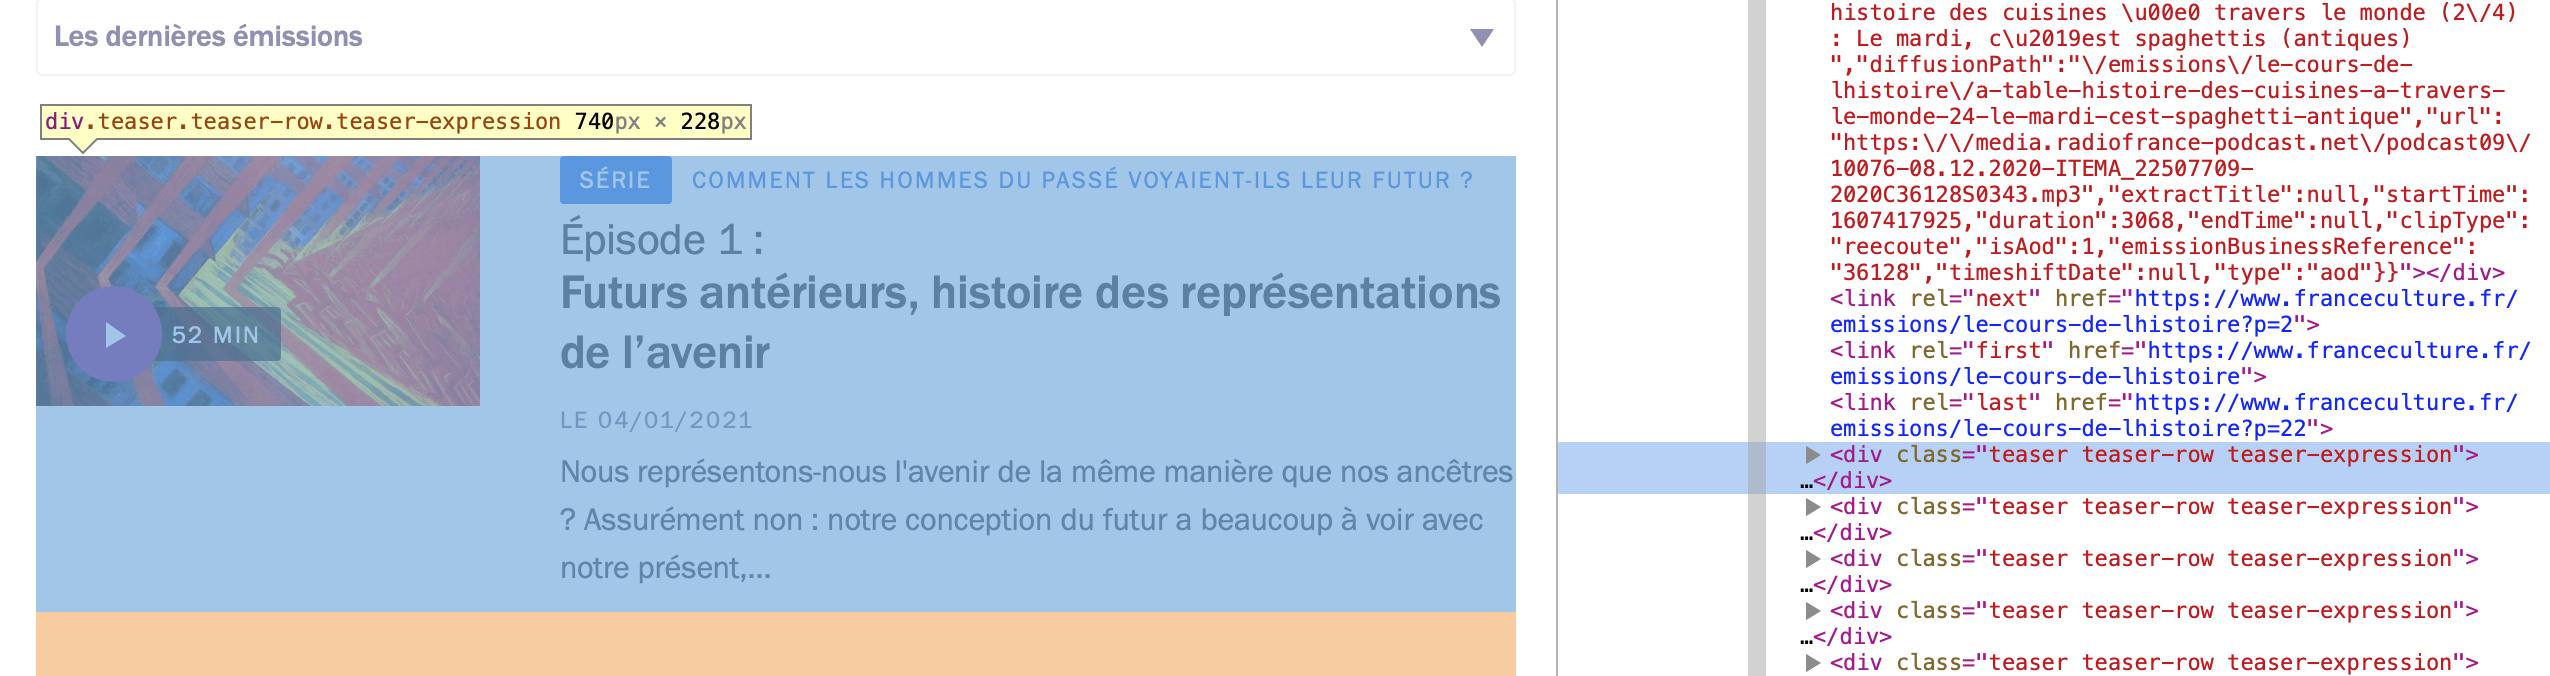
"/>

On voit ici que toutes les émissions sont contenues dans la **balise** `<div class="teaser-list">`. On peut donc se positionner à se niveau-là et récupérer toutes les **balises enfants**.

In [7]:
div = soup.find("div", attrs={"class": "teasers-list"})

En observant la structure du code HTML, on constate que les informations sur chaque épisode sont contenues dans les **balises** `<div class="teaser teaser-row teaser-expression">`.

Si on utilise la propriété `.children` de `BeautifulSoup`, on peut directement se positionner au niveau de ces **balises enfants** pour toutes les parcourir.

<img src="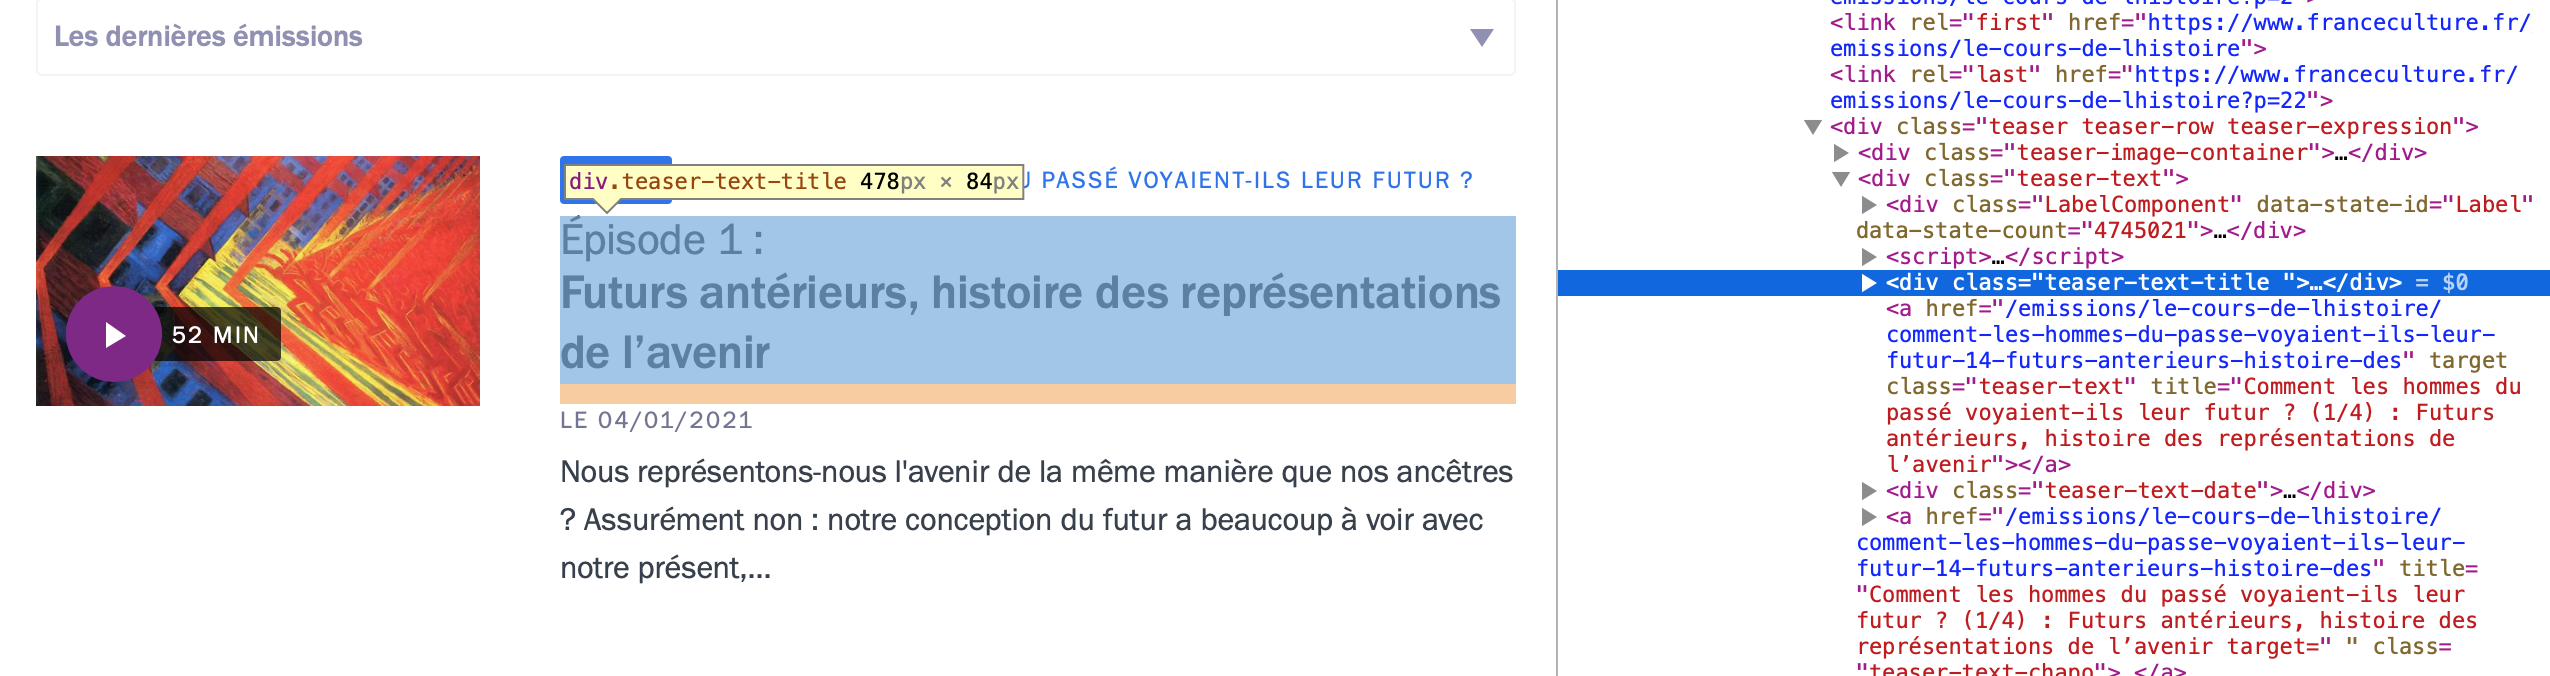
"/>

On constate alors que ces **balises** contiennent à leur tour des **balises enfants** qui contiennent les métadonnées de chaque épisode.

In [8]:
# On parcourt toutes les sous-balises de la balise parent <div class="teaser-list">
for item in div.children:
    # On cherche les balises <div class="teaser-text"> qui contiennent les métadonnées
    teaser_text = item.find("div", attrs={"class": "teaser-text"})

Notons d'emblée qu'il y **15 balises enfants** `<div class="teaser teaser-row teaser-expression">`.

Si on prend le temps d'observer ce qu'il se passe dans notre boucle, on se rendre compte qu'il y a peut-être certaines balises qui ne nous intéressent pas...

Déployons un petit stratagème pour voir efficacement le contenu des balises que l'on parcourt en itérant sur les **balises enfants** de notre **balise** `<div class="teaser-list>`.

Notre **variable** `teaser_text` n'est pas une donnée de type **chaîne de caractère**, mais on peut essayer de la convertir en une **chaîne de caractère** à l'aide de la **fonction** `str()`.

Si on veut, on peut aussi **incrémenter** un compteur (`i`) à chaque tour de boucle pour compter le **nombre de balises enfants** que récupère `BeautifulSoup`.

In [9]:
i = 0
for item in div.children:
    teaser_text = item.find("div", attrs={"class": "teaser-text"})
    print(str(item)[:90])
    i += 1
    
print(i)

<div class="hidden" data-next-episodes="{&quot;6911f504-b143-45ad-b21a-b6ed0f4ec146&quot;:
<link href="https://www.franceculture.fr/emissions/le-cours-de-lhistoire?p=2" rel="next"/>
<link href="https://www.franceculture.fr/emissions/le-cours-de-lhistoire" rel="first"/>
<link href="https://www.franceculture.fr/emissions/le-cours-de-lhistoire?p=22" rel="last"/
<div class="teaser teaser-row teaser-expression"><div class="teaser-image-container"><a cl
<div class="teaser teaser-row teaser-expression"><div class="teaser-image-container"><a cl
<div class="teaser teaser-row teaser-expression"><div class="teaser-image-container"><a cl
<div class="teaser teaser-row teaser-expression"><div class="teaser-image-container"><a cl
<div class="teaser teaser-row teaser-expression"><div class="teaser-image-container"><a cl
<div class="teaser teaser-row teaser-expression"><div class="teaser-image-container"><a cl
<div class="teaser teaser-row teaser-expression"><div class="teaser-image-container"><a cl
<d

On peut constater qu'il y a certaines **balises enfants** qui ne nous intéressent pas vraiment dans le lot ! Il faudra les gérer dans la suite de notre code pour avoir des données propres.

### <div id="#Récupérer les métadonnées">4. 3. Récupérer les métadonnées</div>

Le plus intéressant, à ce stade, serait de créer un **dictionnaire** dans lequel on puisse stocker chaque métadonnée qui nous intéresse.

In [10]:
dict_metadata = {"title": "",
                 "date": "",
                 "duration": ""}

Maintenant que l'on a notre **dictionnaire**, on peut le remplir à mesure que l'on passe sur chaque épisode pour récupérer leurs **métadonnées**. Néanmoins, il nous faudra stocker chaque dictionnaire représentant un épisode dans une **liste**.

In [11]:
list_metadata = []

In [12]:
for item in div.children:
    teaser_text = item.find("div", attrs={"class": "teaser-text"})
    
    # On récupère le titre de l'émission
    try:
        title = teaser_text.find("div", attrs={"class": "teaser-text-title"})
        title = title.get_text()
        dict_metadata["title"] = title
    except:
        continue
    
    # On récupère la date de l'émission
    try:
        date = teaser_text.find("div", attrs={"class": "teaser-text-date"})
        date = date.get_text()
        dict_metadata["date"] = date
    except:
        continue
    
    teaser_img = item.find("div", attrs={"class": "teaser-image-container"})
    
    # On récupère la durée de l'épisode
    try:
        duration = teaser_img.find("span", attrs={"class": "replay-button-duration"})
        # On filtre uniquement le texte
        duration = duration.get_text()
        # On ajoute la donnée au dictionnaire
        dict_metadata["duration"] = duration
    except:
        continue
            
    # A chaque tour de boucle, on ajoute la liste des métadonnées d'un épisode
    list_metadata.append(dict_metadata)

In [13]:
list_metadata[:4]

[{'title': 'Épisode 2 : Le mardi, c’est spaghettis (antiques) ',
  'date': 'LE\n                            08/12/2020',
  'duration': '51 min'},
 {'title': 'Épisode 2 : Le mardi, c’est spaghettis (antiques) ',
  'date': 'LE\n                            08/12/2020',
  'duration': '51 min'},
 {'title': 'Épisode 2 : Le mardi, c’est spaghettis (antiques) ',
  'date': 'LE\n                            08/12/2020',
  'duration': '51 min'},
 {'title': 'Épisode 2 : Le mardi, c’est spaghettis (antiques) ',
  'date': 'LE\n                            08/12/2020',
  'duration': '51 min'}]

Oups... Problème : toutes les métadonnées sont les mêmes ! La raison est très simple, à chaque tour de boucle, nous n'avons pas ajouté le nouveau dictionnaire mais une **référence au dictionnaire**. Pour que les métadonnées soient bien modifiées dans notre `list_metadata`, nous avons deux options :
* Ecraser le dictionnaire à chaque nouveau tour de boucle et en créer un nouveau
* Créer une copie du dictionnaire et y injecter les nouvelles valeurs

Avant de continuer, pensons à écraser notre liste `list_metadata` pour pas récupérer les doublons issus de notre première boucle...

In [14]:
list_metadata = []

In [15]:
for item in div.children:
    teaser_text = item.find("div", attrs={"class": "teaser-text"})
    
    metadata = dict_metadata.copy()
    
    # On récupère le titre de l'émission
    try:
        title = teaser_text.find("div", attrs={"class": "teaser-text-title"})
        title = title.get_text()
        metadata["title"] = title
    except:
        continue
    
    # On récupère la date de l'émission
    try:
        date = teaser_text.find("div", attrs={"class": "teaser-text-date"})
        date = date.get_text()
        metadata["date"] = date
    except:
        continue
    
    teaser_img = item.find("div", attrs={"class": "teaser-image-container"})
    
    # On récupère la durée de l'épisode
    try:
        duration = teaser_img.find("span", attrs={"class": "replay-button-duration"})
        # On filtre uniquement le texte
        duration = duration.get_text()
        # On ajoute la donnée au dictionnaire
        metadata["duration"] = duration
    except:
        continue
            
    # A chaque tour de boucle, on ajoute la liste des métadonnées d'un épisode
    list_metadata.append(metadata)

In [16]:
list_metadata[:4]

[{'title': 'Épisode 1 : Futurs antérieurs, histoire des représentations de l’avenir',
  'date': 'LE\n                            04/01/2021',
  'duration': '52 min'},
 {'title': 'Une girafe à Paris : le voyage de Zarafa',
  'date': 'LE\n                            01/01/2021',
  'duration': '53 min'},
 {'title': 'Épisode 4 :  Mussolini peut-il être un personnage de roman ?',
  'date': 'LE\n                            24/12/2020',
  'duration': '52 min'},
 {'title': 'Épisode 3 : L’historien à la manette, quand le jeu vidéo raconte l’histoire',
  'date': 'LE\n                            23/12/2020',
  'duration': '52 min'}]

Ça a l'air pas mal !

Reste un problème : la date n'est pas formatée très proprement, l'idéal serait de la retravailler à l'aide d'un **regex**.

Deux options là aussi :
* Le retravailler tout de suite
* Nettoyer le jeu de données à l'issue de la collecte

Dans notre cas, nous allons continuer et nous nettoierons le jeu de données à la fin.

### <div id="Tourner la page">4. 4. Tourner la page...</div>

Okay, nous avons récupéré toutes les métadonnées des émissions pour la première page. Maintenant, ce que l'on voudrait faire, c'est passer à la page suivante et répéter la même opération.

Premier réflexe : si on souhaite répéter la même opération, il serait judicieux d'encapsuler notre code dans une **fonction** pour pouvoir le réutiliser.

Commençons par ça.

In [17]:
def scrape_page(soup):
    
    # On se positionne au niveau de la balise parent qui nous intéresse
    div = soup.find("div", attrs={"class": "teasers-list"})
    
    # On crée le schéma de métadonnées à l'aide d'un dictionnaire
    dict_metadata = {"title": "",
                     "date": "",
                     "duration": ""}
    
    # On crée une liste de vide pour ajouter à chaque tour de boucle un nouveau dictionnaire de métadonnées
    list_metadata = []
    
    for item in div.children:
        teaser_text = item.find("div", attrs={"class": "teaser-text"})

        metadata = dict_metadata.copy()

        # On récupère le titre de l'émission
        try:
            title = teaser_text.find("div", attrs={"class": "teaser-text-title"})
            title = title.get_text()
            metadata["title"] = title
        except:
            continue

        # On récupère la date de l'émission
        try:
            date = teaser_text.find("div", attrs={"class": "teaser-text-date"})
            date = date.get_text()
            metadata["date"] = date
        except:
            continue

        teaser_img = item.find("div", attrs={"class": "teaser-image-container"})

        # On récupère la durée de l'épisode
        try:
            duration = teaser_img.find("span", attrs={"class": "replay-button-duration"})
            # On filtre uniquement le texte
            duration = duration.get_text()
            # On ajoute la donnée au dictionnaire
            metadata["duration"] = duration
        except:
            continue

        # A chaque tour de boucle, on ajoute la liste des métadonnées d'un épisode
        list_metadata.append(metadata)
        
    return list_metadata

Parfait, maintenant, nous avons une fonction qui permet de retourner une **liste de métadonnées**. On pourra l'utiliser pour chaque page que nous allons parcourir.

Pour comprendre comment passer à la page suivante, rien de plus simple : cliquons sur le bouton !

<img src="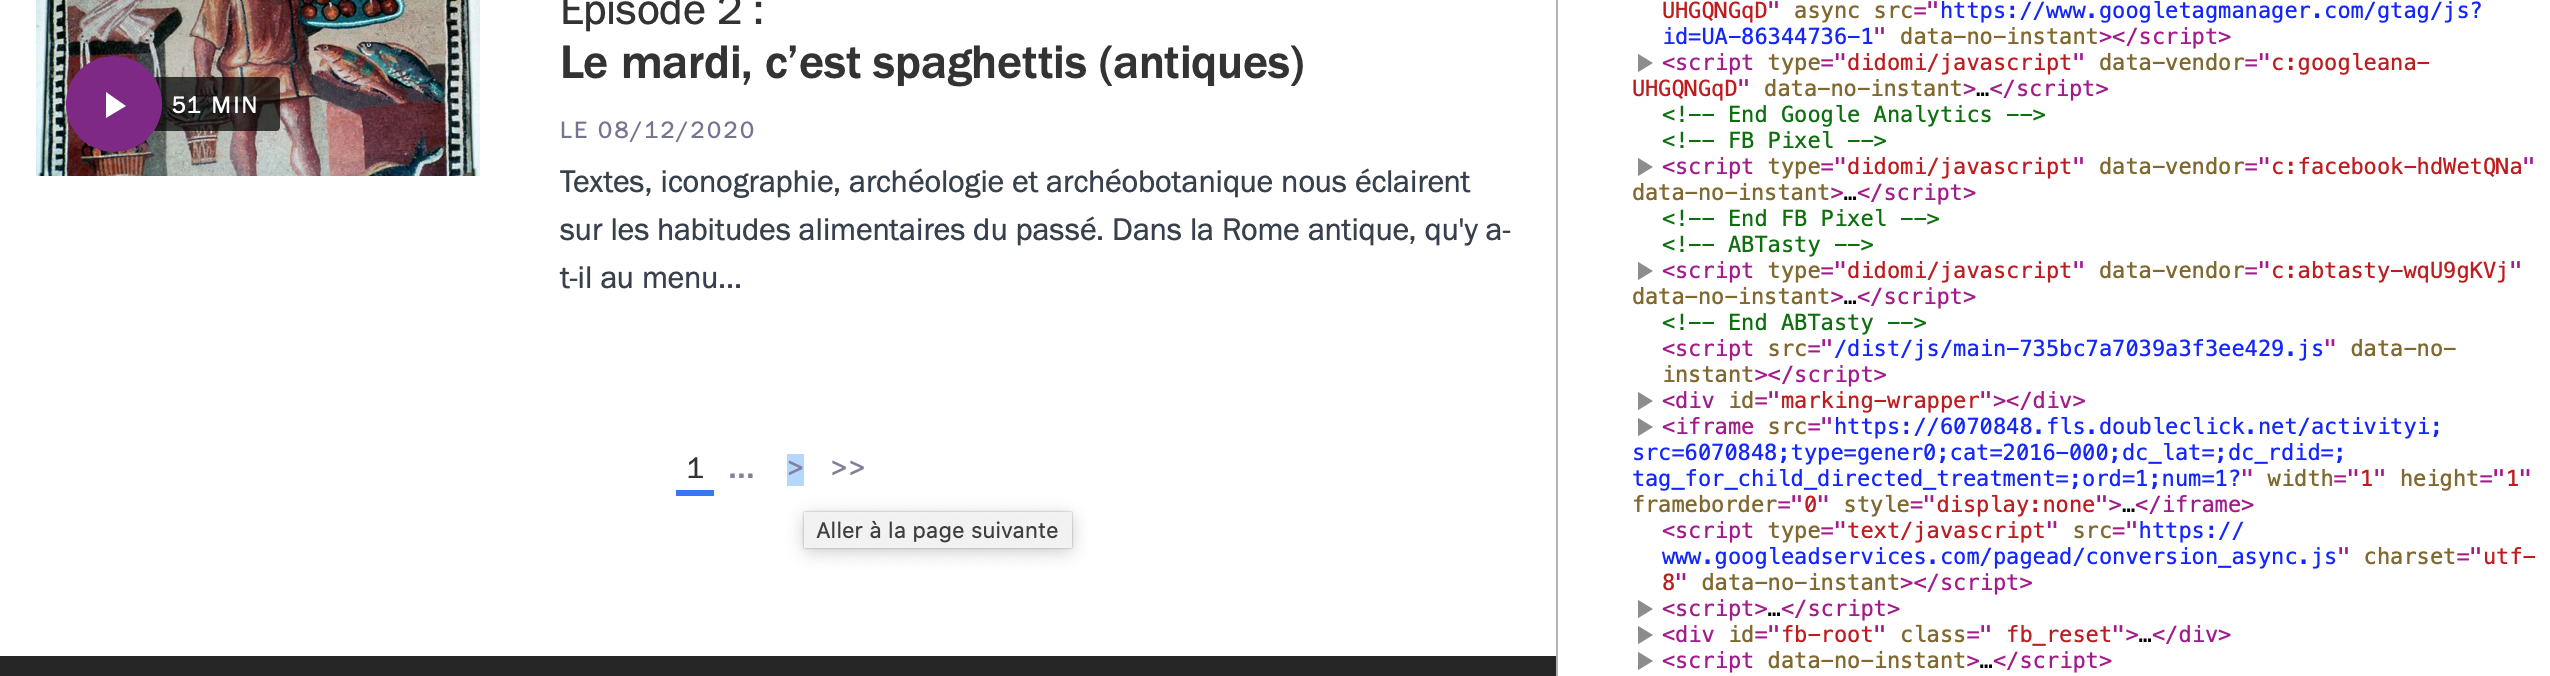
"/>

En passant à la page suivante, on constate que l'**URL** de la page web est différente et elle semble suivre une structure cohérente :
1. `www.franceculture.fr/emissions/le-cours-de-lhistoire`
2. `www.franceculture.fr/emissions/le-cours-de-lhistoire?p=2`
3. `www.franceculture.fr/emissions/le-cours-de-lhistoire?p=3`
4. `www.franceculture.fr/emissions/le-cours-de-lhistoire?p=4`

Etc.

Rien de plus simple pour nous ! Il nous suffit de modifier l'URL en incrémenter la page de 1 à après que notre fonction `scrape_page()` a fini de travailler. Il nous faudra simplement tenir compte de la première page qui est un peu différente.

Voyons cela tout de suite.

In [18]:
url = "https://www.franceculture.fr/emissions/le-cours-de-lhistoire"

# On récupère la page web
r = requests.get(url)
# On fait la soupe...
soup = BeautifulSoup(r.text, "html.parser")
# On utilise notre fonction pour scraper la page (on se rappelle qu'elle retourne une liste de métadonnées)
data = scrape_page(soup)

In [19]:
data

[{'title': 'Épisode 1 : Futurs antérieurs, histoire des représentations de l’avenir',
  'date': 'LE\n                            04/01/2021',
  'duration': '52 min'},
 {'title': 'Une girafe à Paris : le voyage de Zarafa',
  'date': 'LE\n                            01/01/2021',
  'duration': '53 min'},
 {'title': 'Épisode 4 :  Mussolini peut-il être un personnage de roman ?',
  'date': 'LE\n                            24/12/2020',
  'duration': '52 min'},
 {'title': 'Épisode 3 : L’historien à la manette, quand le jeu vidéo raconte l’histoire',
  'date': 'LE\n                            23/12/2020',
  'duration': '52 min'},
 {'title': "Épisode 2 : L'Histoire dessinée, histoire de buller",
  'date': 'LE\n                            22/12/2020',
  'duration': '52 min'},
 {'title': 'Épisode 1 : Quand l’histoire rebat les cartes ',
  'date': 'LE\n                            21/12/2020',
  'duration': '52 min'},
 {'title': 'Il y a cent ans, la naissance du Parti communiste français ',
  'date

Incroyable, tout marche à merveille !

Maintenant, il nous faut donc gérer nos pages suivantes et faire attention à la façon dont on ajoute les métadonnées des épisodes suivants dans la liste `data`.

On se rappelle qu'on peut ajouter les éléments d'une liste à une seconde liste simplement avec l'opérateur `+`. On optera pour cette solution, certes peu élégante, mais fonctionnelle pour l'instant. Une fois que l'on sera assuré d'avoir bien récupérer les données, on pourra modifier un peu notre code pour faire quelque chose d'un peu plus propre.

En attendant, voyons comment transformer notre **URL** pour passer au scraping des pages suivantes. Pour cela, rien de plus simple : on peut simplement utiliser une **string formatée** que l'on fera évoluer à chaque tour de boucle.

In [20]:
page = 2
url_page = f"?p={page}"
url + url_page

'https://www.franceculture.fr/emissions/le-cours-de-lhistoire?p=2'

Combinons tout cela maintenant. Mais pensons à vérifier avant combien il y a de pages au total (spoiler : il y a en 22).

Cela peut prendre un peu de temps, il y a quand même un peu de boulot... Si on veut pouvoir suivre la progression du travail, on peut utiliser une **bibliothèque** au petit nom de `tqdm`. En entourant un **itérable** de la fonction `tqdm()`, on peut suivre la progression.

In [40]:
from tqdm import tqdm

url = "https://www.franceculture.fr/emissions/le-cours-de-lhistoire"

# On récupère la page web
r = requests.get(url)
# On fait la soupe...
soup = BeautifulSoup(r.text, "html.parser")
# On utilise notre fonction pour scraper la page (on se rappelle qu'elle retourne une liste de métadonnées)
data = scrape_page(soup)

# Nombre de pages à tourner
nb_page = 22
# Page de départ
page = 2

for i in tqdm(range(2, nb_page+1)):
    page = i
    new_url = url + f"?p={page}"
    r = requests.get(new_url)
    soup = BeautifulSoup(r.text, "html.parser")
    d = scrape_page(soup)
    data.extend(d)

100%|██████████| 21/21 [00:06<00:00,  3.14it/s]


On peut voir qu'on a récupéré les métadonnées pour 327 épisodes. C'est pas mal.

In [41]:
len(data)

327

L'ordre des dates a l'air décroissant, on dirait qu'on a bien réussi à récupérer ce qu'on voulait.

In [42]:
data[320:]

[{'title': 'Épisode 2 : Comment les nationalismes puisent dans les civilisations perdues ou inventées pour se construire ? ',
  'date': 'LE\n                            03/09/2019',
  'duration': '52 min'},
 {'title': 'Épisode 1 : Pourquoi les paradis perdus nous fascinent-ils tant ?',
  'date': 'LE\n                            02/09/2019',
  'duration': '52 min'},
 {'title': 'Épisode 5 : Berlin à la trace  ',
  'date': 'LE\n                            30/08/2019',
  'duration': '53 min'},
 {'title': 'Épisode 4 : La querelle des images ou l’art allemand après la chute du mur de Berlin',
  'date': 'LE\n                            29/08/2019',
  'duration': '53 min'},
 {'title': 'Épisode 3 : Trente ans après, comment agissent encore les archives de la Stasi sur la société allemande ?',
  'date': 'LE\n                            28/08/2019',
  'duration': '52 min'},
 {'title': 'Épisode 2 : La RDA par elle-même',
  'date': 'LE\n                            27/08/2019',
  'duration': '52 min

### <div id="Remettons un peu d'ordre">4. 5. Remettons un peu d'ordre</div>

Bon, c'est pas mal, on a un code fonctionnel, mais le mieux serait d'avoir un code qui soit à la fois fonctionnel et propre.

In [43]:
from tqdm import tqdm

# Nombre de pages à tourner
nb_page = 22

for page in tqdm(range(nb_page + 1)):
    
    if page < 2:
        url = "https://www.franceculture.fr/emissions/le-cours-de-lhistoire"
        r = requests.get(url)
        soup = BeautifulSoup(r.text, "html.parser")
        data = scrape_page(soup)
    else:
        new_url = url + f"?p={page}"
        r = requests.get(new_url)
        soup = BeautifulSoup(r.text, "html.parser")
        new_data = scrape_page(soup)
        data.extend(new_data)

100%|██████████| 23/23 [00:07<00:00,  2.88it/s]


C'est un peu mieux. Mais rappelons-nous qu'il nous reste à nettoyer un peu les données que l'on a collecté.

In [50]:
data[0]["date"]

'LE\n                            04/01/2021'

Pas incroyable. Essayons de voir si on peut arranger cela avec une **regex**.

Dans la date que l'on récupère, on a un motif qui se répète :
* "LE"
* "\n"
* Plein d'espaces

In [56]:
import re

# On matche LE et tous les espaces (y compris les tabulations et les retour chariot)
regex = re.compile(r"LE\s+")

result = re.sub(regex, "", data[0]["date"])
result

'04/01/2021'

On peut encapsuler ça dans une fonction et nettoyer notre jeu de données grâce à elle.

In [57]:
def clean_date(date):
    
    regex = re.compile(r"LE\s+")
    result = re.sub(regex, "", date)
    
    return result

Allons-y pour faire passer nos données dans la fonction `clean_date()`.

In [62]:
for elem in data:
    elem["date"] = clean_date(elem["date"])

In [65]:
data[:4]

[{'title': 'Épisode 1 : Futurs antérieurs, histoire des représentations de l’avenir',
  'date': '04/01/2021',
  'duration': '52 min'},
 {'title': 'Une girafe à Paris : le voyage de Zarafa',
  'date': '01/01/2021',
  'duration': '53 min'},
 {'title': 'Épisode 4 :  Mussolini peut-il être un personnage de roman ?',
  'date': '24/12/2020',
  'duration': '52 min'},
 {'title': 'Épisode 3 : L’historien à la manette, quand le jeu vidéo raconte l’histoire',
  'date': '23/12/2020',
  'duration': '52 min'}]

Ça a l'air pas mal ! Chargeons toutes les données dans un fichier CSV.

In [66]:
import pandas as pd

df = pd.DataFrame(data)
df.to_csv("cours_histoire.csv")
df.head()

,title,date,duration
0,"Épisode 1 : Futurs antérieurs, histoire des re...",04/01/2021,52 min
1,Une girafe à Paris : le voyage de Zarafa,01/01/2021,53 min
2,Épisode 4 : Mussolini peut-il être un personn...,24/12/2020,52 min
3,"Épisode 3 : L’historien à la manette, quand le...",23/12/2020,52 min
4,"Épisode 2 : L'Histoire dessinée, histoire de b...",22/12/2020,52 min


## Sources et références utiles

Le présent support a été réalisé à l'aide des références suivantes.

* **Documentation officielle :**
    * **BeautifulSoup, URL : https://www.crummy.com/software/BeautifulSoup/bs4/doc/.**
    * **Requests, URL : https://requests.readthedocs.io/en/master/.**
* **Tutoriel vidéo :**
    * **Kimberly Fessel, "It's officially legal so let's scrape the web", URL : https://www.youtube.com/watch?v=RUQWPJ1T6Zc**. : Un tutoriel très complet qui part des bases et illustre toutes les étapes nécessaires pour scraper les données d'un site web.